In [1]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1rGXLBAo_NWvDbLCpAdE2n9tJpsd7J8yi' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1rGXLBAo_NWvDbLCpAdE2n9tJpsd7J8yi" -O Elaine.bmp && rm -rf /tmp/cookies.txt

--2022-12-01 08:34:44--  https://docs.google.com/uc?export=download&confirm=&id=1rGXLBAo_NWvDbLCpAdE2n9tJpsd7J8yi
Resolving docs.google.com (docs.google.com)... 64.233.189.100, 64.233.189.113, 64.233.189.138, ...
Connecting to docs.google.com (docs.google.com)|64.233.189.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/c73uhnojtdajgnbppjhldosatf7qogna/1669883625000/01865608280713457520/*/1rGXLBAo_NWvDbLCpAdE2n9tJpsd7J8yi?e=download&uuid=2ed4748a-0cc9-4e95-aa05-6167216e1eab [following]
--2022-12-01 08:34:44--  https://doc-04-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/c73uhnojtdajgnbppjhldosatf7qogna/1669883625000/01865608280713457520/*/1rGXLBAo_NWvDbLCpAdE2n9tJpsd7J8yi?e=download&uuid=2ed4748a-0cc9-4e95-aa05-6167216e1eab
Resolving doc-04-64-docs.googleusercontent.com (doc-04-64-docs.googleusercontent.com)... 64.233.189.132, 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import cv2
from math import *
from sklearn.metrics import mean_squared_error
%matplotlib inline

3.2

3.2.1

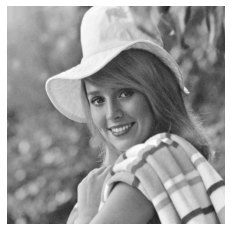

In [3]:
elaine_img=cv2.imread('Elaine.bmp')
elaine_img = cv2.cvtColor(elaine_img,cv2.COLOR_BGR2GRAY)
plt.imshow(elaine_img,cmap='gray')
plt.axis('off')
plt.show()
#(512, 512) uint8

In [4]:
def show_img(*args, figsize=10, is_gray=True, title=None, fontsize=12):
    if isinstance(figsize, int):
        figsize = (figsize, figsize)
    images = args[0] if type(args[0]) is list else list(args)
    cmap=None
    if not is_gray:
        images = list(map(lambda x: cv2.cvtColor(x, cv2.COLOR_BGR2RGB), images))
    else:
        cmap = 'gray'
    plt.figure(figsize=figsize)
    for i in range(1, len(images)+1):
        plt.subplot(1, len(images), i)
        if title is not None:
            plt.title(title[i-1], fontsize=fontsize)
        
        plt.imshow(images[i-1], cmap=cmap)
        plt.axis('off')

In [5]:
from skimage.util import random_noise
def noise_distributer(img,noise_mode,noise_density,var):
  if noise_mode == 's&p':
    out=random_noise(img,noise_mode,amount=noise_density)

  if noise_mode == 'gaussian': # mean?
    out=random_noise(img,noise_mode,var=var)  
  return (out*255).astype('uint8')

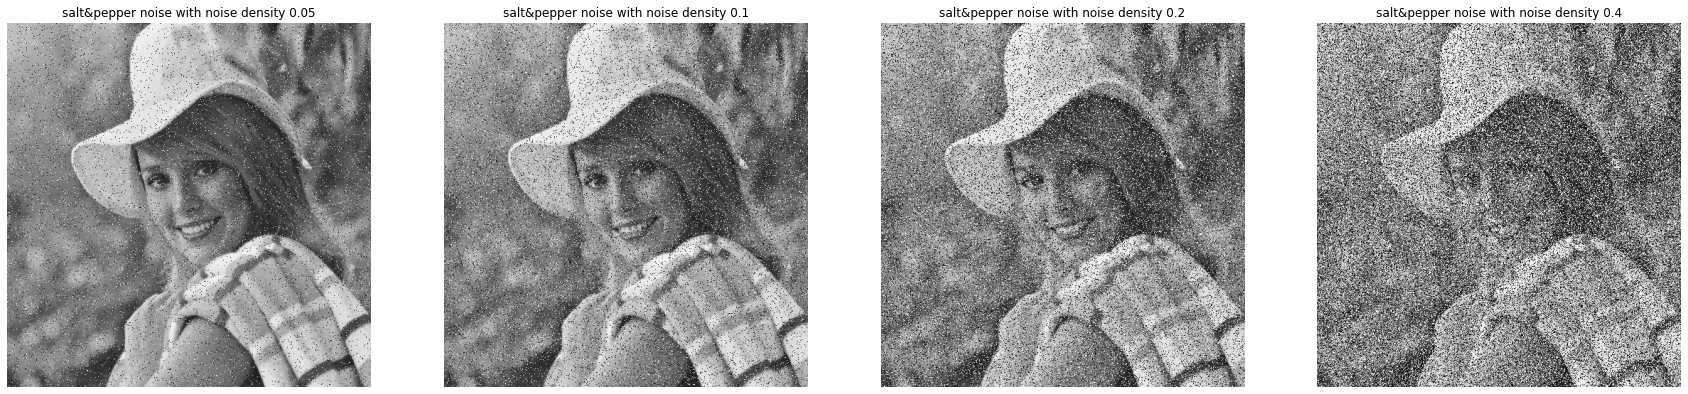

In [6]:
noisy_sp_img_results=[]

noisy_sp_img_results.append(noise_distributer(elaine_img,'s&p',0.05,0))
noisy_sp_img_results.append(noise_distributer(elaine_img,'s&p',0.1,0))
noisy_sp_img_results.append(noise_distributer(elaine_img,'s&p',0.2,0))
noisy_sp_img_results.append(noise_distributer(elaine_img,'s&p',0.4,0))
titles=['salt&pepper noise with noise density 0.05','salt&pepper noise with noise density 0.1','salt&pepper noise with noise density 0.2','salt&pepper noise with noise density 0.4']

show_img(noisy_sp_img_results, figsize=30,title=titles)

In [7]:
def apply_median_filter(img,window_size):
  img_copy=img.copy()
  shift = floor(window_size/2)
  x,y=img_copy.shape
  out = np.zeros((x-2*shift,y-2*shift))
  for i in range(shift,x-shift):
    for j in range(shift,y-shift):
      window = img_copy[i-shift:i+shift,j-shift:j+shift]
      window = window.ravel()
      median=np.median(window)
      out[i-shift,j-shift]=median

  return out     

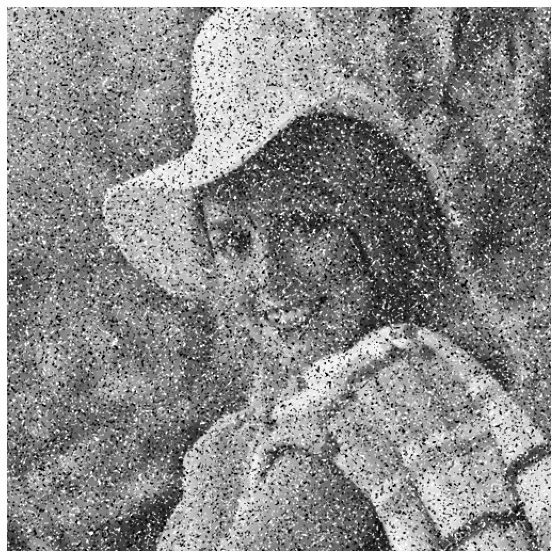

In [8]:
elaine_sp_01_median_5=apply_median_filter(noisy_sp_img_results[3],3)
show_img(elaine_sp_01_median_5)

In [9]:
elaine_sp_01_median_5

array([[127.5, 222.5, 190. , ..., 110. , 182. ,  98. ],
       [ 95. , 190. , 190. , ..., 116. , 185. ,  97.5],
       [ 95. ,  95. ,  95. , ..., 115.5, 107.5, 103. ],
       ...,
       [ 54. ,  55. ,  62.5, ...,  80. ,  80. , 165.5],
       [ 62.5,  63.5,  63.5, ...,   0. ,   0. , 166.5],
       [ 71.5,  70. ,  60.5, ...,  76.5,  83.5, 211. ]])

In [10]:
filter_wondow_sizes=[3,5,7,9,11]
median_filter_results=[]
median_filter_results_titles=[]
noise_densities=[0.05,0.1,0.2,0.4]

for (index,noisy_img) in enumerate(noisy_sp_img_results):
  median_results_window=[] # each row for each imahe with density 
  median_results_window_title=[]
  for size in  filter_wondow_sizes:
    median_img=apply_median_filter(noisy_img,size)
    median_results_window.append(median_img)# each col is size
    median_results_window_title.append(f'median filter size: {size} on s&p noise: {noise_densities[index]}')
    shift=floor(size/2)
    x,y=elaine_img.shape
    bounded_noisey_image = elaine_img[shift:x-shift,shift:y-shift]
    mse = mean_squared_error(bounded_noisey_image,median_img)
    print(f'mse elaine_img & median filter {size} size on sp noise density {noise_densities[index]} is :{mse}')
  print('--------------------------------------------------------')
  median_filter_results.append(median_results_window)
  median_filter_results_titles.append(median_results_window_title)    



mse elaine_img & median filter 3 size on sp noise density 0.05 is :82.69665128796615
mse elaine_img & median filter 5 size on sp noise density 0.05 is :55.72548088846178
mse elaine_img & median filter 7 size on sp noise density 0.05 is :61.083356442062836
mse elaine_img & median filter 9 size on sp noise density 0.05 is :70.9117437484253
mse elaine_img & median filter 11 size on sp noise density 0.05 is :83.65778320979032
--------------------------------------------------------
mse elaine_img & median filter 3 size on sp noise density 0.1 is :201.54014898116108
mse elaine_img & median filter 5 size on sp noise density 0.1 is :58.02669395963792
mse elaine_img & median filter 7 size on sp noise density 0.1 is :62.73560846912152
mse elaine_img & median filter 9 size on sp noise density 0.1 is :72.2102879346183
mse elaine_img & median filter 11 size on sp noise density 0.1 is :84.71058296693704
--------------------------------------------------------
mse elaine_img & median filter 3 size o

<ipython-input-11-87d85e58b3d0>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for i in range(0,np.array(median_filter_results).shape[0]):


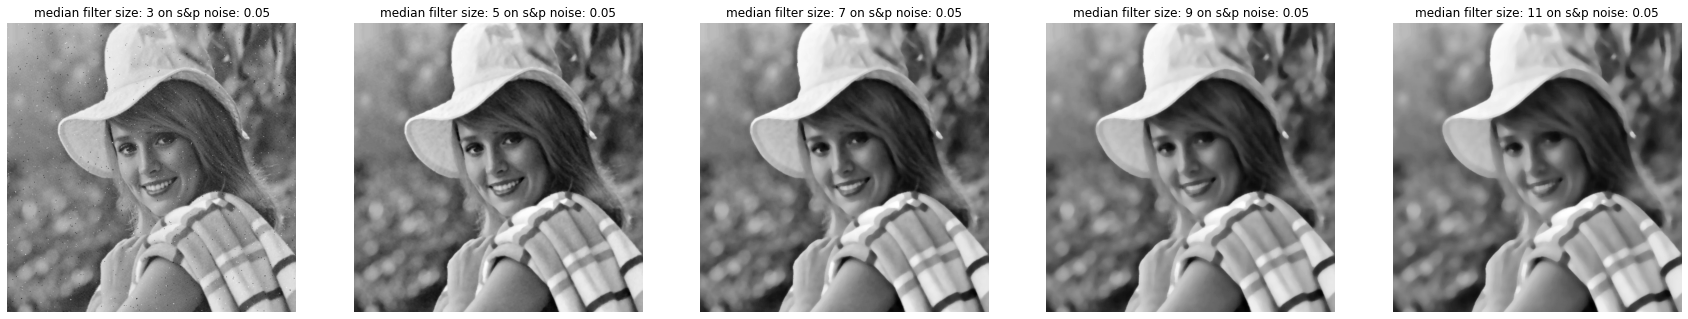

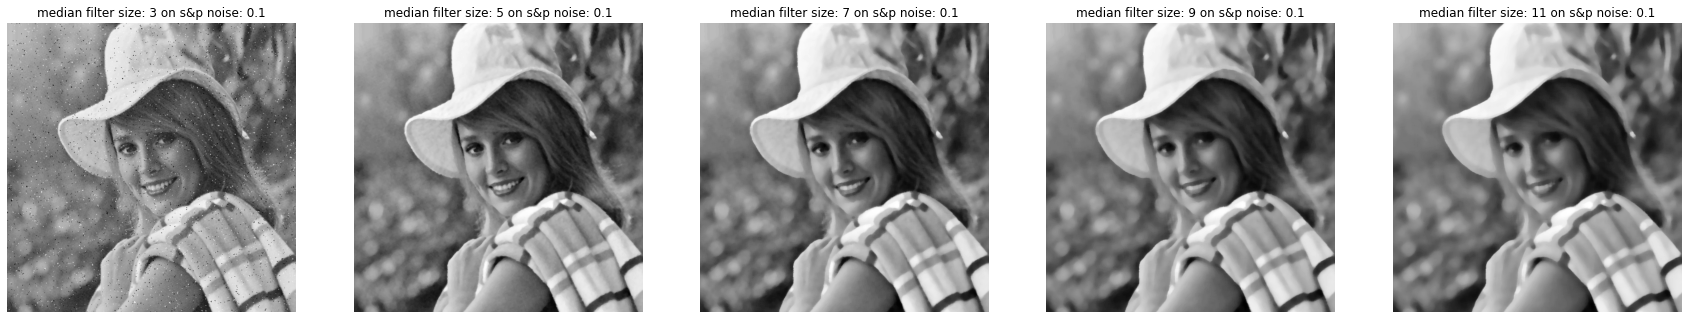

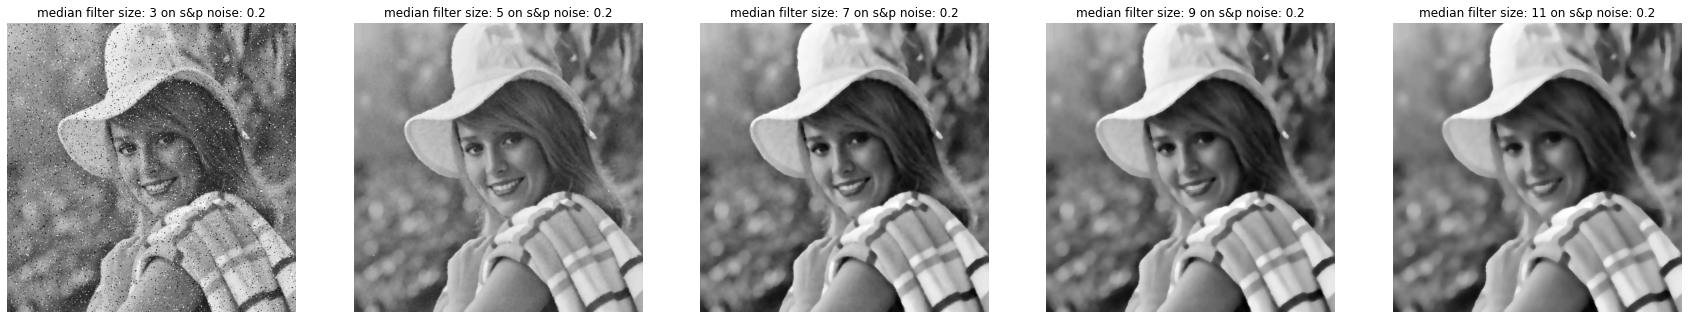

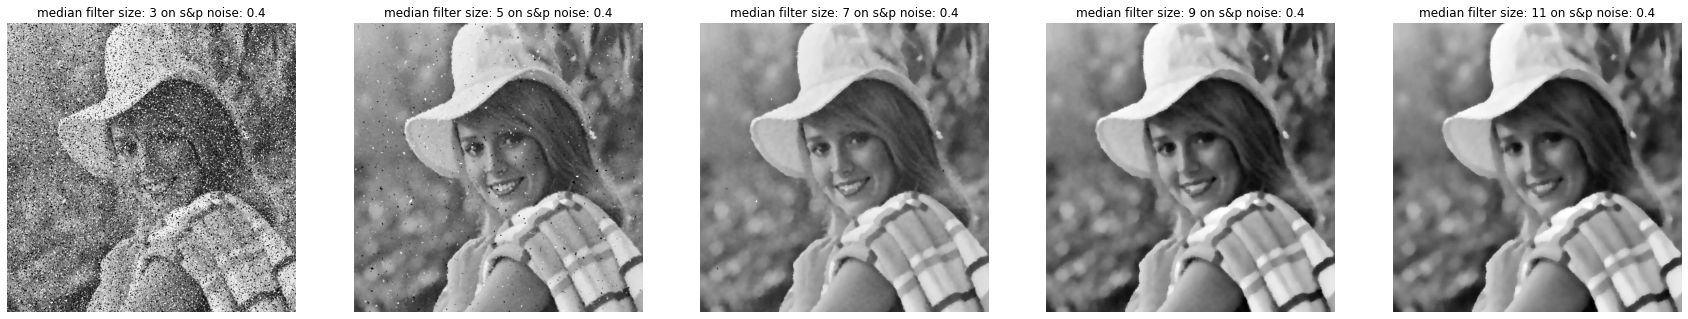

In [11]:
for i in range(0,np.array(median_filter_results).shape[0]):
  show_img(median_filter_results[i], figsize=30,title=median_filter_results_titles[i])

3.2.2

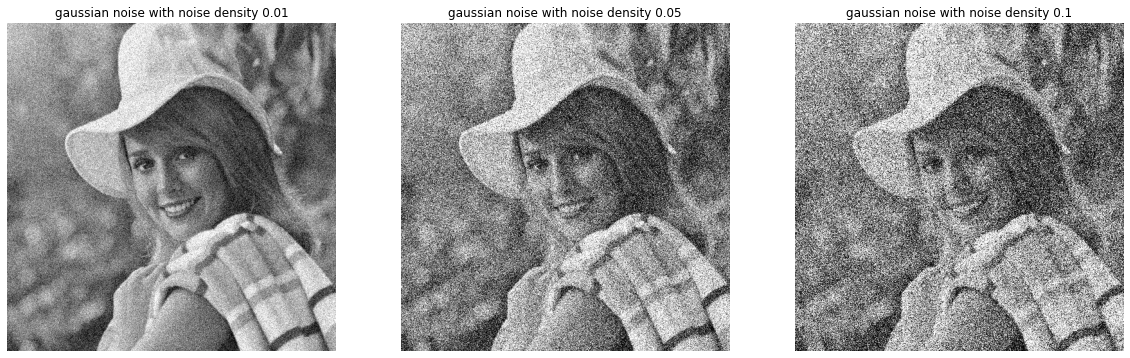

In [12]:
noisy_gaussian_img_results=[]

noisy_gaussian_img_results.append(noise_distributer(elaine_img,'gaussian',0,0.01))
noisy_gaussian_img_results.append(noise_distributer(elaine_img,'gaussian',0,0.05))
noisy_gaussian_img_results.append(noise_distributer(elaine_img,'gaussian',0,0.1))

titles=['gaussian noise with noise density 0.01','gaussian noise with noise density 0.05','gaussian noise with noise density 0.1']

show_img(noisy_gaussian_img_results, figsize=20,title=titles)

In [13]:
filter_wondow_sizes=[3,5,7,9,11]
median_filter_results=[]
median_filter_results_titles=[]
noise_densities=[0.01,0.05,0.1]

for (index,noisy_img) in enumerate(noisy_gaussian_img_results):
  median_results_window=[] # each row for each imahe with density 
  median_results_window_title=[]
  for size in  filter_wondow_sizes:
    median_img=apply_median_filter(noisy_img,size)
    median_results_window.append(median_img)# each col is size
    median_results_window_title.append(f'median filter size: {size} on gaussian noise: {noise_densities[index]}')
    shift=floor(size/2)
    x,y=elaine_img.shape
    bounded_noisey_image = elaine_img[shift:x-shift,shift:y-shift]
    mse = mean_squared_error(bounded_noisey_image,median_img)
    print(f'mse elaine_img & median filter {size} size on gaussian noise density {noise_densities[index]} is :{mse}')
  print('--------------------------------------------------------')
  median_filter_results.append(median_results_window)
  median_filter_results_titles.append(median_results_window_title)    

mse elaine_img & median filter 3 size on gaussian noise density 0.01 is :240.25818435217224
mse elaine_img & median filter 5 size on gaussian noise density 0.01 is :115.87066192882386
mse elaine_img & median filter 7 size on gaussian noise density 0.01 is :93.2821351294349
mse elaine_img & median filter 9 size on gaussian noise density 0.01 is :95.51179059586796
mse elaine_img & median filter 11 size on gaussian noise density 0.01 is :106.81870724274218
--------------------------------------------------------
mse elaine_img & median filter 3 size on gaussian noise density 0.05 is :964.1673981161092
mse elaine_img & median filter 5 size on gaussian noise density 0.05 is :347.97513407526816
mse elaine_img & median filter 7 size on gaussian noise density 0.05 is :205.79063393429047
mse elaine_img & median filter 9 size on gaussian noise density 0.05 is :166.61480477607708
mse elaine_img & median filter 11 size on gaussian noise density 0.05 is :161.3420699671434
--------------------------

<ipython-input-14-87d85e58b3d0>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for i in range(0,np.array(median_filter_results).shape[0]):


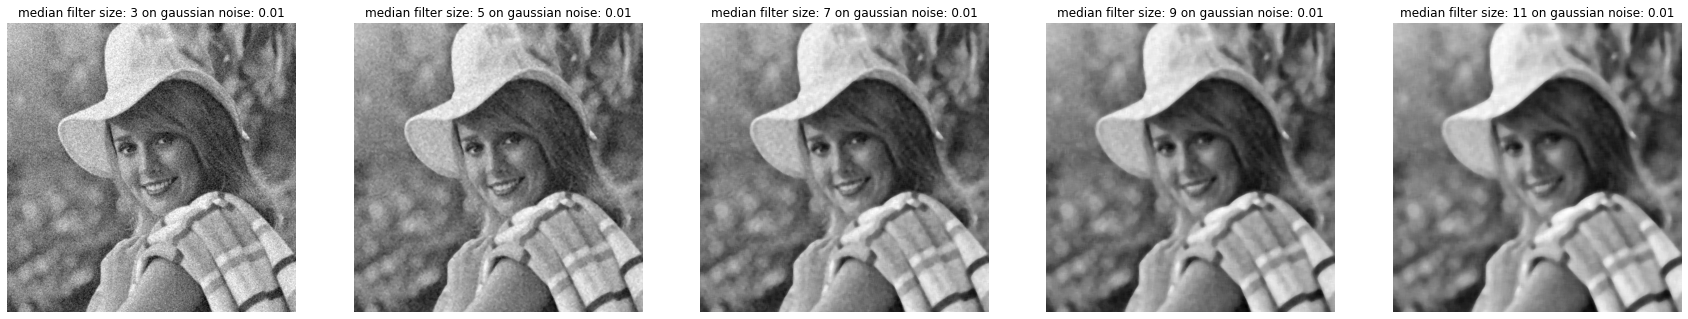

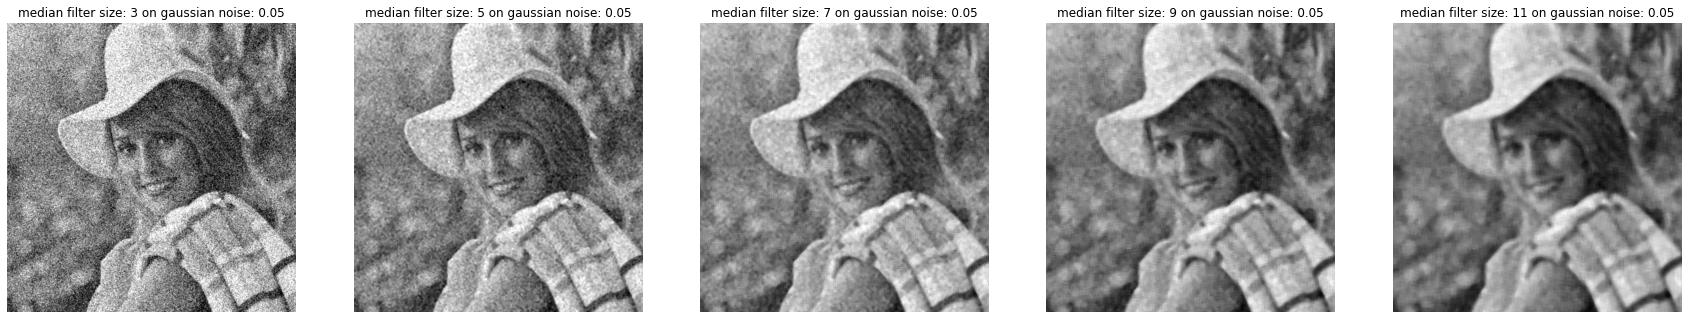

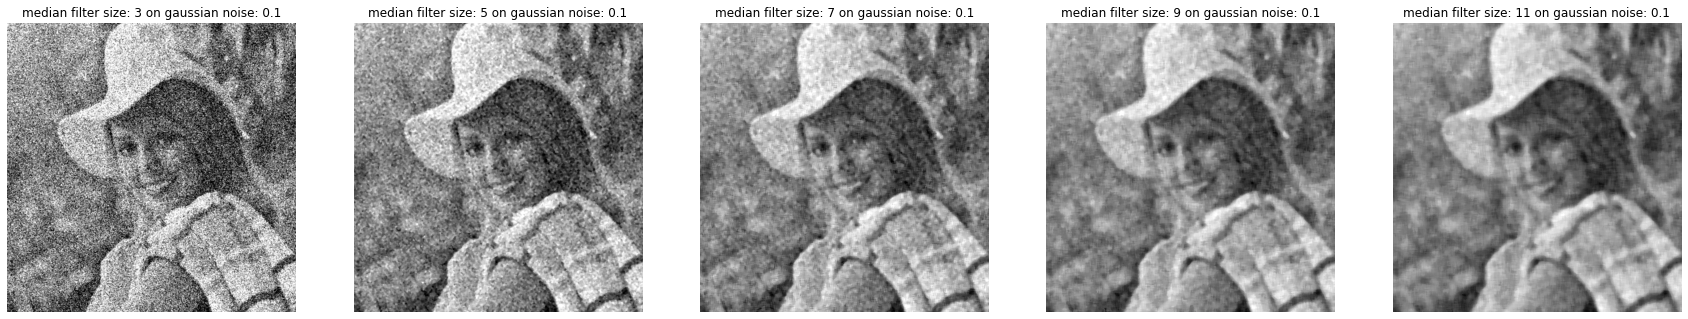

In [14]:
for i in range(0,np.array(median_filter_results).shape[0]):
  show_img(median_filter_results[i], figsize=30,title=median_filter_results_titles[i])

In [17]:
def apply_box_filter(img,window_size):
  img_copy=img.copy()
  shift = floor(window_size/2)
  x,y=img_copy.shape
  out = np.zeros((x-2*shift,y-2*shift))
  for i in range(shift,x-shift):
    for j in range(shift,y-shift):
      window = img_copy[i-shift:i+shift+1,j-shift:j+shift+1]
      #print(window)
      box_avg = (np.sum(window)) / (window_size**2)
      out[i-shift,j-shift]=box_avg

  return out.astype('uint8')     

In [18]:
filter_wondow_sizes=[3,5,7,9,11]
boxfilter_filter_results=[]
boxfilter_filter_results_titles=[]
noise_densities=[0.01,0.05,0.1]

for (index,noisy_img) in enumerate(noisy_gaussian_img_results):
  boxfilter_results_window=[] # each row for each imahe with density 
  boxfilter_results_window_title=[]
  for size in  filter_wondow_sizes:
    boxfilter_img=apply_box_filter(noisy_img,size)
    boxfilter_results_window.append(boxfilter_img)# each col is size
    boxfilter_results_window_title.append(f'boxfilter filter size: {size} on gaussian noise: {noise_densities[index]}')
    shift=floor(size/2)
    x,y=elaine_img.shape
    bounded_noisey_image = elaine_img[shift:x-shift,shift:y-shift]
    mse = mean_squared_error(bounded_noisey_image,boxfilter_img)
    print(f'mse elaine_img & boxfilter filter {size} size on gaussian noise density {noise_densities[index]} is :{mse}')
  print('--------------------------------------------------------')
  boxfilter_filter_results.append(boxfilter_results_window)
  boxfilter_filter_results_titles.append(boxfilter_results_window_title)    

mse elaine_img & boxfilter filter 3 size on gaussian noise density 0.01 is :61.808000768935024
mse elaine_img & boxfilter filter 5 size on gaussian noise density 0.01 is :51.419240963481926
mse elaine_img & boxfilter filter 7 size on gaussian noise density 0.01 is :49.008846412223285
mse elaine_img & boxfilter filter 9 size on gaussian noise density 0.01 is :51.02781714537667
mse elaine_img & boxfilter filter 11 size on gaussian noise density 0.01 is :53.82928048761131
--------------------------------------------------------
mse elaine_img & boxfilter filter 3 size on gaussian noise density 0.05 is :85.99344482891196
mse elaine_img & boxfilter filter 5 size on gaussian noise density 0.05 is :74.46733755967512
mse elaine_img & boxfilter filter 7 size on gaussian noise density 0.05 is :68.70393616522676
mse elaine_img & boxfilter filter 9 size on gaussian noise density 0.05 is :66.59101788863694
mse elaine_img & boxfilter filter 11 size on gaussian noise density 0.05 is :66.5571498865097

<ipython-input-19-144028983dcc>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for i in range(0,np.array(boxfilter_filter_results).shape[0]):


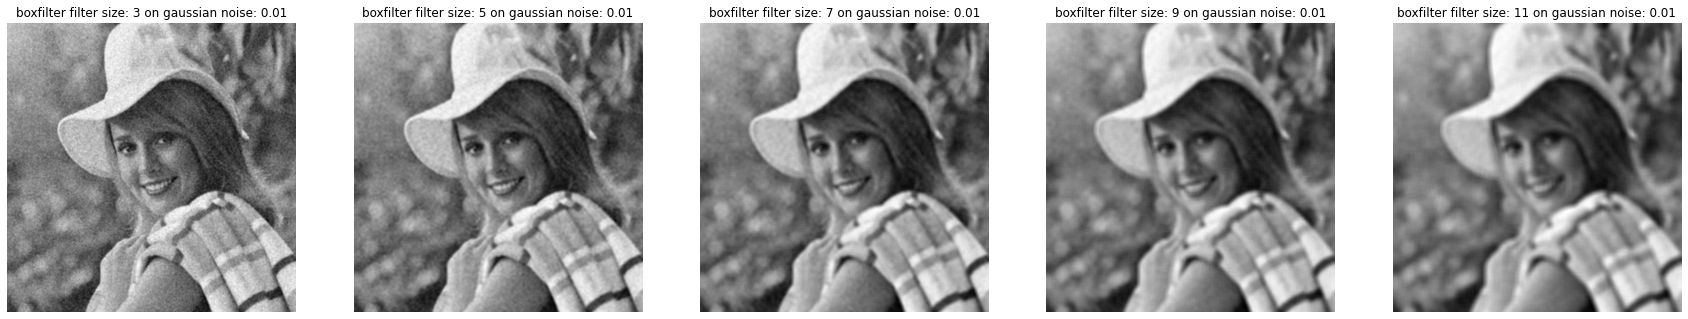

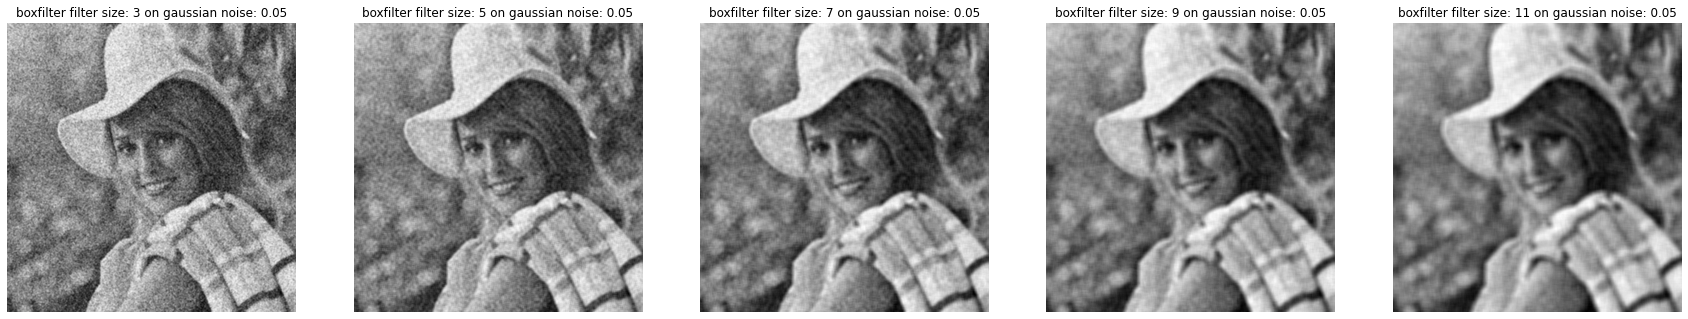

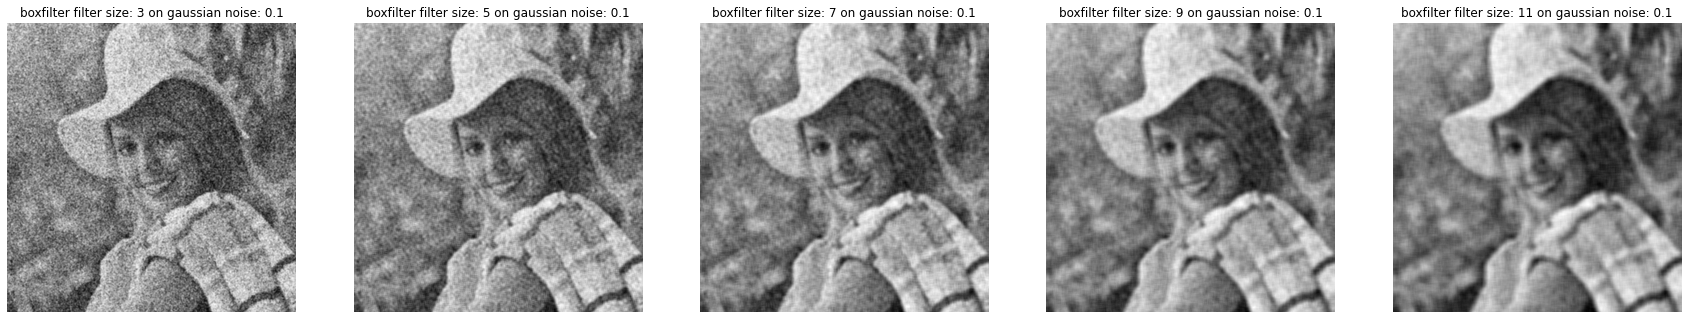

In [19]:
for i in range(0,np.array(boxfilter_filter_results).shape[0]):
  show_img(boxfilter_filter_results[i], figsize=30,title=boxfilter_filter_results_titles[i])

In [ ]:
def apply_guessian_filter(img,window_size):
  img_copy=img.copy()
  shift = floor(window_size/2)
  x,y=img_copy.shape
  out = np.zeros((x-2*shift,y-2*shift))
  for i in range(shift,x-shift):
    for j in range(shift,y-shift):
      window = img_copy[i-shift:i+shift+1,j-shift:j+shift+1]
      #print(window)
      box_avg = (np.sum(window)) / (window_size**2)
      out[i-shift,j-shift]=box_avg

      x, y = np.mgrid[-kernel_size//2 + 1:kernel_size//2 + 1, -kernel_size//2 + 1:kernel_size//2 + 1]
      g = np.exp(-((x**2 + y**2)/(2.0*sigma**2)))
      return g/g.sum()

  return out.astype('uint8') 